In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data = pd.read_excel('/content/CocaCola.xlsx')

In [3]:
data

,Quarter,Unnamed: 1,Unnamed: 2,Quarter.1,Sales
0,Q1_86,Q1,1986,1986Q1,1734.827000
1,Q2_86,Q2,1986,1986Q2,2244.960999
2,Q3_86,Q3,1986,1986Q3,2533.804993
3,Q4_86,Q4,1986,1986Q4,2154.962997
4,Q1_87,Q1,1987,1987Q1,1547.818996
5,Q2_87,Q2,1987,1987Q2,2104.411995
6,Q3_87,Q3,1987,1987Q3,2014.362999
7,Q4_87,Q4,1987,1987Q4,1991.746998
8,Q1_88,Q1,1988,1988Q1,1869.049999
9,Q2_88,Q2,1988,1988Q2,2313.631996


In [4]:
data['Sales'] = data['Sales'].round(0)

In [5]:
data = data.iloc[:,3:]

In [6]:
data

,Quarter.1,Sales
0,1986Q1,1735.0
1,1986Q2,2245.0
2,1986Q3,2534.0
3,1986Q4,2155.0
4,1987Q1,1548.0
5,1987Q2,2104.0
6,1987Q3,2014.0
7,1987Q4,1992.0
8,1988Q1,1869.0
9,1988Q2,2314.0


In [7]:
data['date'] = (
    pd.to_datetime(
        data['Quarter.1'].str.split(' ').apply(lambda x: ''.join(x[::-1]))
))

In [8]:
data = data.drop('Quarter.1' , axis =1)

In [9]:
data.dtypes

Sales           float64
date     datetime64[ns]
dtype: object

In [10]:
data = data.set_index(data['date'])

In [11]:
data.drop('date' , axis =1 , inplace = True)

In [12]:
data

,Sales
date,
1986-01-01,1735.0
1986-04-01,2245.0
1986-07-01,2534.0
1986-10-01,2155.0
1987-01-01,1548.0
1987-04-01,2104.0
1987-07-01,2014.0
1987-10-01,1992.0
1988-01-01,1869.0


In [13]:
data.shape

(42, 1)

In [14]:
data.describe()

,Sales
count,42.000000
mean,2994.380952
std,977.914629
min,1548.000000
25%,2159.750000
50%,2782.500000
75%,3609.250000
max,5253.000000


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 42 entries, 1986-01-01 to 1996-04-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   42 non-null     float64
dtypes: float64(1)
memory usage: 672.0 bytes


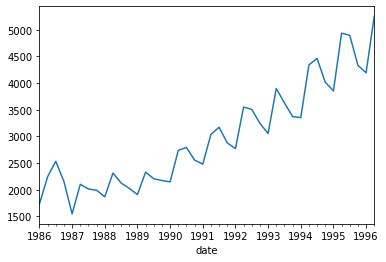

In [16]:
data['Sales'].plot()

**we can see that it is a seasonal data**

In [17]:
data.isnull().sum()

Sales    0
dtype: int64

**there are no missing values**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


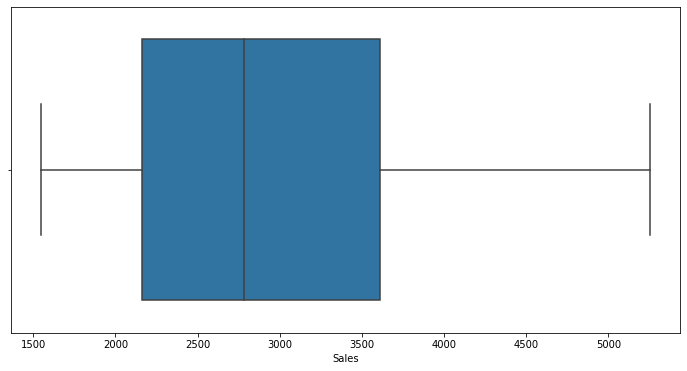

In [18]:
plt.figure(figsize=(12,6))
sns.boxplot(data['Sales'])
plt.show()

**there are no outliers and it is right skewed data**

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

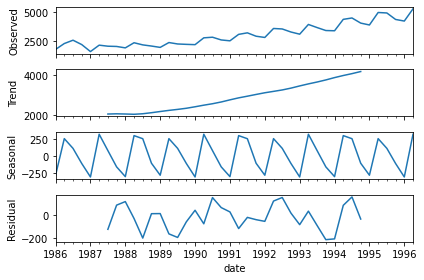

In [20]:
decompose_ts_add = seasonal_decompose(data['Sales'],freq= 12)
decompose_ts_add.plot()
plt.show()

In [21]:
len(data)

42

In [22]:
(20/100)*42

8.4

In [23]:
42-9

33

In [24]:
train = data.head(32)

In [25]:
train

,Sales
date,
1986-01-01,1735.0
1986-04-01,2245.0
1986-07-01,2534.0
1986-10-01,2155.0
1987-01-01,1548.0
1987-04-01,2104.0
1987-07-01,2014.0
1987-10-01,1992.0
1988-01-01,1869.0


In [26]:
test = data.tail(10)

In [27]:
test

,Sales
date,
1994-01-01,3352.0
1994-04-01,4342.0
1994-07-01,4461.0
1994-10-01,4017.0
1995-01-01,3854.0
1995-04-01,4936.0
1995-07-01,4895.0
1995-10-01,4333.0
1996-01-01,4194.0


**The data has a trend as well as a seasonal component**

In [28]:
from sklearn.metrics import mean_squared_error

# **Simple Moving Average**

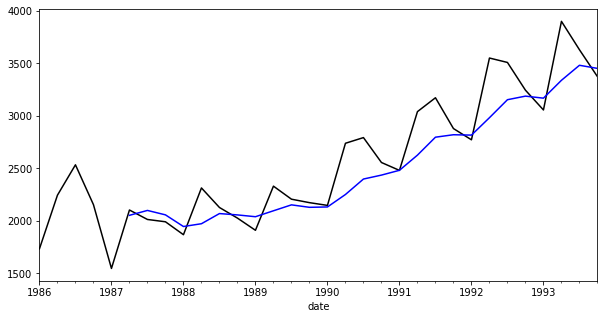

In [29]:
train['Sales'].plot(color = 'black')
train['Sales'].rolling(6).mean().plot(figsize = (10,5) , color = 'blue')

In [30]:
forecast = test.copy()

In [31]:
forecast['sma_forecast'] = test['Sales'].rolling(5).mean()

In [32]:
forecast

,Sales,sma_forecast
date,,
1994-01-01,3352.0,NaN
1994-04-01,4342.0,NaN
1994-07-01,4461.0,NaN
1994-10-01,4017.0,NaN
1995-01-01,3854.0,4005.2
1995-04-01,4936.0,4322.0
1995-07-01,4895.0,4432.6
1995-10-01,4333.0,4407.0
1996-01-01,4194.0,4442.4


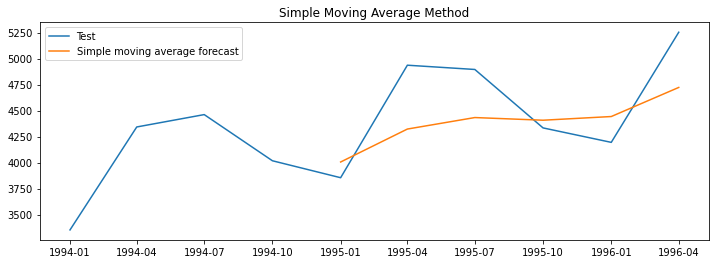

In [33]:
plt.figure(figsize=(12,4))
plt.plot(test['Sales'], label='Test')
plt.plot(forecast['sma_forecast'], label='Simple moving average forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()

In [34]:
forecast = forecast.fillna(0)

In [35]:
mse = mean_squared_error(forecast['sma_forecast'],test['Sales'])
RMSE = np.sqrt(mse)
RMSE

2590.1404672333892

# **Cumulative moving average**

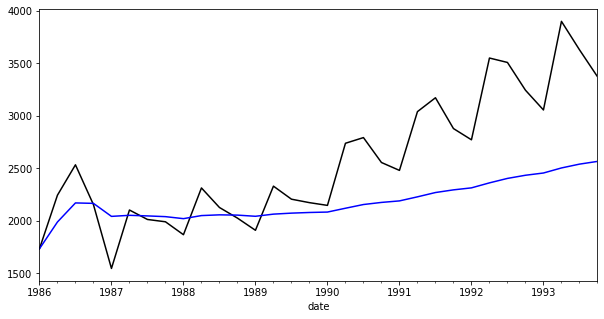

In [36]:
train['Sales'].plot(color = 'black')
train['Sales'].expanding().mean().plot(figsize = (10,5
                                                       ),color = 'blue')

In [37]:
forecast['cma_forecast'] = test['Sales'].expanding().mean()

In [38]:
forecast

,Sales,sma_forecast,cma_forecast
date,,,
1994-01-01,3352.0,0.0,3352.000000
1994-04-01,4342.0,0.0,3847.000000
1994-07-01,4461.0,0.0,4051.666667
1994-10-01,4017.0,0.0,4043.000000
1995-01-01,3854.0,4005.2,4005.200000
1995-04-01,4936.0,4322.0,4160.333333
1995-07-01,4895.0,4432.6,4265.285714
1995-10-01,4333.0,4407.0,4273.750000
1996-01-01,4194.0,4442.4,4264.888889


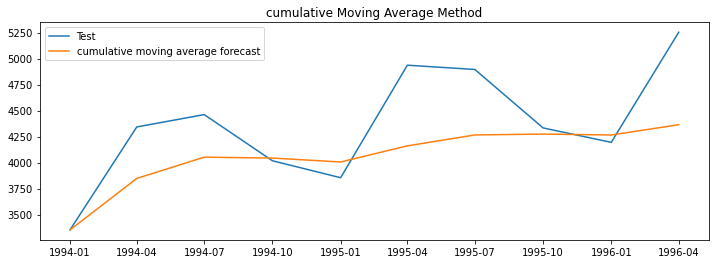

In [39]:
plt.figure(figsize=(12,4))
plt.plot(test['Sales'], label='Test')
plt.plot(forecast['cma_forecast'], label='cumulative moving average forecast')
plt.legend(loc='best')
plt.title('cumulative Moving Average Method')
plt.show()

In [40]:
mse = mean_squared_error(forecast['cma_forecast'],test.Sales)
RMSE = np.sqrt(mse)
RMSE

472.62092254322704

In [41]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

# **Simple Exponential method**

In [42]:
import warnings
warnings.filterwarnings("ignore")
ses_model = SimpleExpSmoothing(train['Sales']).fit(smoothing_level=0.2)

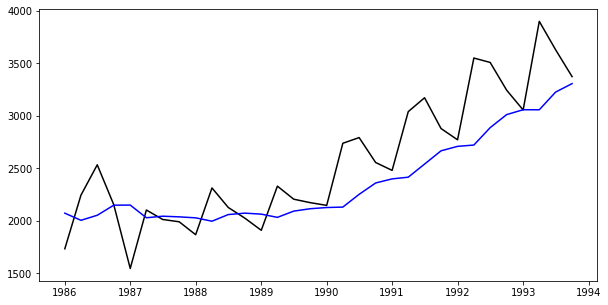

In [43]:
plt.figure(figsize=(10, 5))
plt.plot(train['Sales'] , color="black")
plt.plot(ses_model.fittedvalues, color="blue")

In [44]:
forecast['ses_forecast'] = ses_model.forecast(len(test))

In [45]:
forecast

,Sales,sma_forecast,cma_forecast,ses_forecast
date,,,,
1994-01-01,3352.0,0.0,3352.000000,3319.876842
1994-04-01,4342.0,0.0,3847.000000,3319.876842
1994-07-01,4461.0,0.0,4051.666667,3319.876842
1994-10-01,4017.0,0.0,4043.000000,3319.876842
1995-01-01,3854.0,4005.2,4005.200000,3319.876842
1995-04-01,4936.0,4322.0,4160.333333,3319.876842
1995-07-01,4895.0,4432.6,4265.285714,3319.876842
1995-10-01,4333.0,4407.0,4273.750000,3319.876842
1996-01-01,4194.0,4442.4,4264.888889,3319.876842


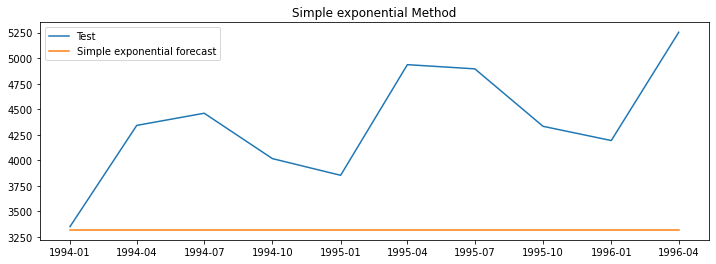

In [46]:
plt.figure(figsize=(12,4))
plt.plot(test['Sales'], label='Test')
plt.plot(forecast['ses_forecast'], label='Simple exponential forecast')
plt.legend(loc='best')
plt.title('Simple exponential Method')
plt.show()

In [47]:
mse = mean_squared_error(forecast['ses_forecast'],test.Sales)
RMSE = np.sqrt(mse)
RMSE

1172.1578373606444

# **Exponential Weighted Moving Average**

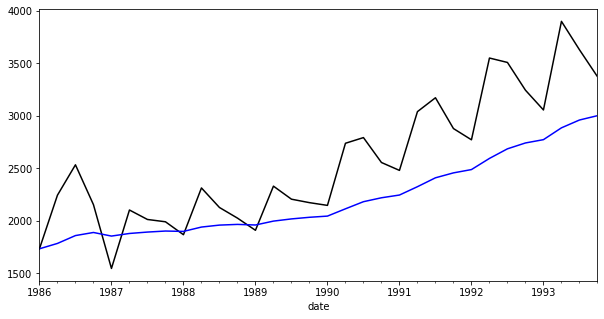

In [48]:
plt.figure(figsize = (10,5))
train['Sales'].plot(color = 'black')
train['Sales'].ewm(alpha=0.1, adjust=False).mean().plot(color = 'blue')

In [49]:
forecast['ewm_forecast'] = test['Sales'].ewm(alpha=0.1, adjust=False).mean()

In [50]:
forecast

,Sales,sma_forecast,cma_forecast,ses_forecast,ewm_forecast
date,,,,,
1994-01-01,3352.0,0.0,3352.000000,3319.876842,3352.000000
1994-04-01,4342.0,0.0,3847.000000,3319.876842,3451.000000
1994-07-01,4461.0,0.0,4051.666667,3319.876842,3552.000000
1994-10-01,4017.0,0.0,4043.000000,3319.876842,3598.500000
1995-01-01,3854.0,4005.2,4005.200000,3319.876842,3624.050000
1995-04-01,4936.0,4322.0,4160.333333,3319.876842,3755.245000
1995-07-01,4895.0,4432.6,4265.285714,3319.876842,3869.220500
1995-10-01,4333.0,4407.0,4273.750000,3319.876842,3915.598450
1996-01-01,4194.0,4442.4,4264.888889,3319.876842,3943.438605


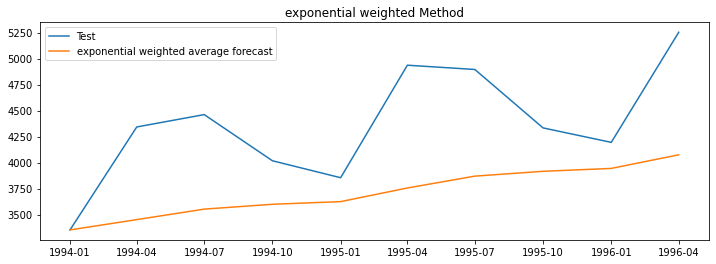

In [51]:
plt.figure(figsize=(12,4))
plt.plot(test['Sales'], label='Test')
plt.plot(forecast['ewm_forecast'], label='exponential weighted average forecast')
plt.legend(loc='best')
plt.title('exponential weighted Method')
plt.show()

In [52]:
mse = mean_squared_error(forecast['ewm_forecast'],test.Sales)
RMSE = np.sqrt(mse)
RMSE

769.4610204581005

# **Holts linear method**

In [53]:
import warnings
warnings.filterwarnings("ignore")
hm_model = Holt(train['Sales']).fit(smoothing_level=0.3)

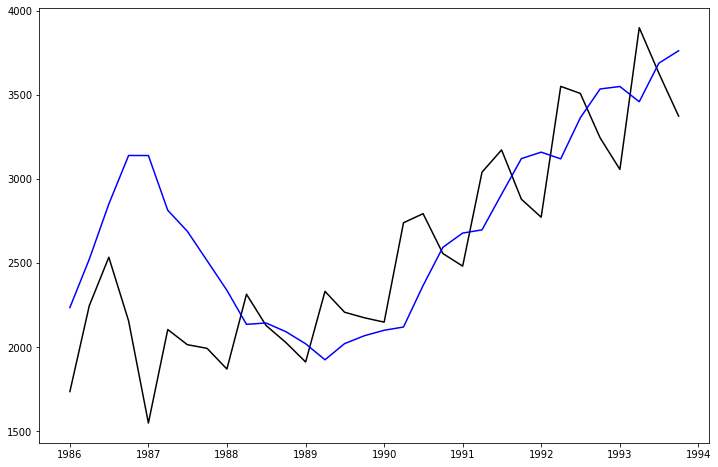

In [54]:
plt.figure(figsize=(12, 8))
plt.plot(train['Sales'],  color="black")
plt.plot(hm_model.fittedvalues,  color="blue")

In [55]:
forecast['hm_forecast'] = hm_model.forecast(len(test))

In [56]:
forecast

,Sales,sma_forecast,cma_forecast,ses_forecast,ewm_forecast,hm_forecast
date,,,,,,
1994-01-01,3352.0,0.0,3352.000000,3319.876842,3352.000000,3701.997978
1994-04-01,4342.0,0.0,3847.000000,3319.876842,3451.000000,3758.747912
1994-07-01,4461.0,0.0,4051.666667,3319.876842,3552.000000,3815.497845
1994-10-01,4017.0,0.0,4043.000000,3319.876842,3598.500000,3872.247778
1995-01-01,3854.0,4005.2,4005.200000,3319.876842,3624.050000,3928.997712
1995-04-01,4936.0,4322.0,4160.333333,3319.876842,3755.245000,3985.747645
1995-07-01,4895.0,4432.6,4265.285714,3319.876842,3869.220500,4042.497578
1995-10-01,4333.0,4407.0,4273.750000,3319.876842,3915.598450,4099.247511
1996-01-01,4194.0,4442.4,4264.888889,3319.876842,3943.438605,4155.997445


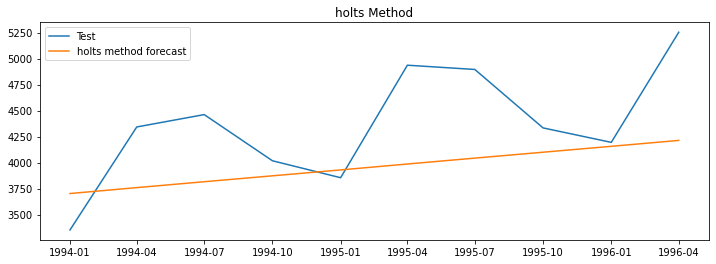

In [57]:
plt.figure(figsize=(12,4))
plt.plot(test['Sales'], label='Test')
plt.plot(forecast['hm_forecast'], label='holts method forecast')
plt.legend(loc='best')
plt.title('holts Method')
plt.show()

In [58]:
mse = mean_squared_error(forecast['hm_forecast'],test.Sales)
RMSE = np.sqrt(mse)
RMSE

606.1255920568377

# **Holts winter exponential smoothing with additive seasonality and additive trend**

In [59]:
import warnings
warnings.filterwarnings("ignore")
hwm_model = ExponentialSmoothing(train['Sales'],seasonal_periods=4).fit(smoothing_level=0.2) 

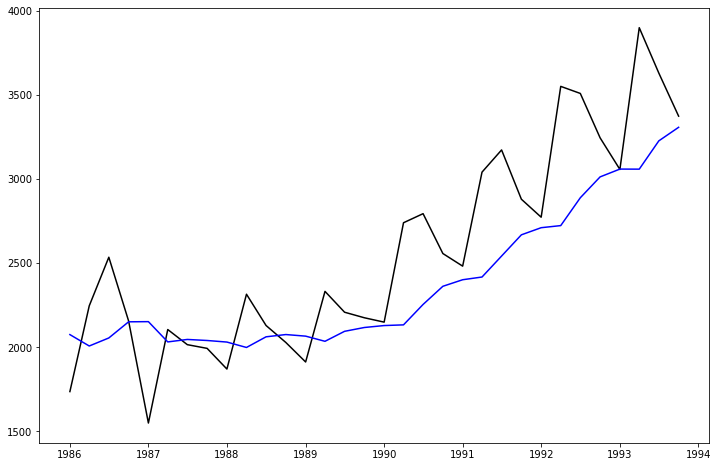

In [60]:
plt.figure(figsize=(12, 8))
plt.plot(train['Sales'],  color="black")
plt.plot(hwm_model.fittedvalues,  color="blue")

In [61]:
forecast['hwm_forecast'] = hwm_model.forecast(10)

In [62]:
forecast

,Sales,sma_forecast,cma_forecast,ses_forecast,ewm_forecast,hm_forecast,hwm_forecast
date,,,,,,,
1994-01-01,3352.0,0.0,3352.000000,3319.876842,3352.000000,3701.997978,3319.876842
1994-04-01,4342.0,0.0,3847.000000,3319.876842,3451.000000,3758.747912,3319.876842
1994-07-01,4461.0,0.0,4051.666667,3319.876842,3552.000000,3815.497845,3319.876842
1994-10-01,4017.0,0.0,4043.000000,3319.876842,3598.500000,3872.247778,3319.876842
1995-01-01,3854.0,4005.2,4005.200000,3319.876842,3624.050000,3928.997712,3319.876842
1995-04-01,4936.0,4322.0,4160.333333,3319.876842,3755.245000,3985.747645,3319.876842
1995-07-01,4895.0,4432.6,4265.285714,3319.876842,3869.220500,4042.497578,3319.876842
1995-10-01,4333.0,4407.0,4273.750000,3319.876842,3915.598450,4099.247511,3319.876842
1996-01-01,4194.0,4442.4,4264.888889,3319.876842,3943.438605,4155.997445,3319.876842


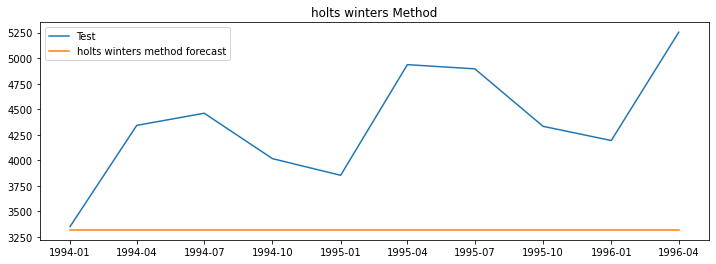

In [63]:
plt.figure(figsize=(12,4))
plt.plot(test['Sales'], label='Test')
plt.plot(forecast['hwm_forecast'], label='holts winters method forecast')
plt.legend(loc='best')
plt.title('holts winters Method')
plt.show()

In [64]:
mse = mean_squared_error(forecast['hwm_forecast'],test.Sales)
RMSE = np.sqrt(mse)
RMSE

1172.1578373606444

# **We conclude that the Cumulative moving average method in the smoothing techniques is able to forecast the sales closer to the actual values.The RMSE values for this method are lower as compared to other model methods. This method is very well able to capture the trend and seasonality in the data.**

# **Autoregressive models**

Dicky fuller test

In [65]:
from statsmodels.tsa.stattools import adfuller

In [66]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))

In [67]:
adf_test(data['Sales'])

ADF Statistics: 1.3077857858014816
p- value: 0.9966521752544724


## data is not stationary , we can do differencing

In [68]:
data['First Difference']=data['Sales']-data['Sales'].shift(1)

In [69]:
data

,Sales,First Difference
date,,
1986-01-01,1735.0,NaN
1986-04-01,2245.0,510.0
1986-07-01,2534.0,289.0
1986-10-01,2155.0,-379.0
1987-01-01,1548.0,-607.0
1987-04-01,2104.0,556.0
1987-07-01,2014.0,-90.0
1987-10-01,1992.0,-22.0
1988-01-01,1869.0,-123.0


In [70]:
adf_test(data['First Difference'].dropna())

ADF Statistics: -2.500856414188464
p- value: 0.11526608897374768


p value greater than 0.05 , data is still not stationary , continuing to second differencing

In [71]:
data['Second Difference']=data['First Difference']-data['First Difference'].shift(1)

In [72]:
data = data.fillna(0)

In [73]:
data

,Sales,First Difference,Second Difference
date,,,
1986-01-01,1735.0,0.0,0.0
1986-04-01,2245.0,510.0,0.0
1986-07-01,2534.0,289.0,-221.0
1986-10-01,2155.0,-379.0,-668.0
1987-01-01,1548.0,-607.0,-228.0
1987-04-01,2104.0,556.0,1163.0
1987-07-01,2014.0,-90.0,-646.0
1987-10-01,1992.0,-22.0,68.0
1988-01-01,1869.0,-123.0,-101.0


In [74]:
adf_test(data['Second Difference'].dropna())

ADF Statistics: -16.64934240388791
p- value: 1.609112131826193e-29


##p value greater than 0.05 , data is now stationary

In [75]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

## PACF plot

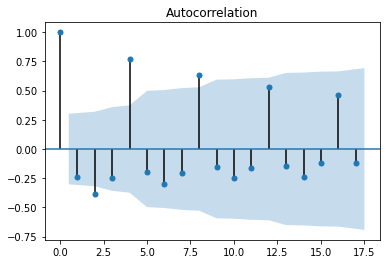

In [76]:
acf = plot_acf(data["Second Difference"].dropna())

## ACF plot

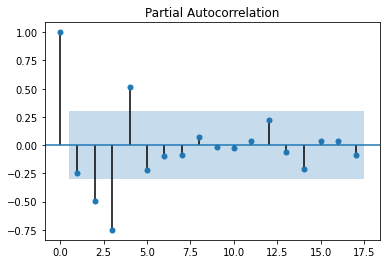

In [77]:
acf = plot_pacf(data["Second Difference"].dropna())

In [78]:
train_diff = data['Second Difference'].head(32)

In [79]:
train_diff

date
1986-01-01       0.0
1986-04-01       0.0
1986-07-01    -221.0
1986-10-01    -668.0
1987-01-01    -228.0
1987-04-01    1163.0
1987-07-01    -646.0
1987-10-01      68.0
1988-01-01    -101.0
1988-04-01     568.0
1988-07-01    -631.0
1988-10-01      85.0
1989-01-01     -15.0
1989-04-01     536.0
1989-07-01    -544.0
1989-10-01      91.0
1990-01-01       7.0
1990-04-01     617.0
1990-07-01    -537.0
1990-10-01    -291.0
1991-01-01     162.0
1991-04-01     634.0
1991-07-01    -427.0
1991-10-01    -425.0
1992-01-01     186.0
1992-04-01     885.0
1992-07-01    -820.0
1992-10-01    -222.0
1993-01-01      76.0
1993-04-01    1031.0
1993-07-01   -1113.0
1993-10-01      14.0
Name: Second Difference, dtype: float64

In [80]:
test_diff = data['Second Difference'].tail(10)

In [81]:
test_diff

date
1994-01-01     235.0
1994-04-01    1011.0
1994-07-01    -871.0
1994-10-01    -563.0
1995-01-01     281.0
1995-04-01    1245.0
1995-07-01   -1123.0
1995-10-01    -521.0
1996-01-01     423.0
1996-04-01    1198.0
Name: Second Difference, dtype: float64

# **Auto regression method (AR)**

In [82]:
from statsmodels.tsa.arima_model import ARIMA

In [83]:
import warnings
warnings.filterwarnings("ignore")
model_ar = ARIMA(train_diff, order=(4, 0, 0)).fit()

In [84]:
model_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:      Second Difference   No. Observations:                   32
Model:                     ARMA(4, 0)   Log Likelihood                -226.910
Method:                       css-mle   S.D. of innovations            274.962
Date:                Thu, 12 May 2022   AIC                            465.821
Time:                        18:37:13   BIC                            474.615
Sample:                    01-01-1986   HQIC                           468.736
                         - 10-01-1993                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     -18.9112     22.036     -0.858      0.398     -62.102      24.279
ar.L1.Second Difference    -0.6092      0.188     -3.237      0.003      -0.978      -0.240
ar.L2.Second Difference    -0.5495      0.203     -2.712      0.011      -0.947      -0.152
ar.L3.Second Difference    -0.4670      0.208     -2.243      0.033      -0.875      -0.059
ar.L4.Second Difference     0.3347      0.202      1.656      0.109      -0.061       0.731
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.0573           -0.0000j            1.0573           -0.5000
AR.2           -0.0337           -1.0584j            1.0589           -0.2551
AR.3           -0.0337           +1.0584j            1.0589            0.2551
AR.4            2.5199           -0.0000j            2.5199           -0.0000
-----------------------------------------------------------------------------
"""

In [85]:
pred_start_date=test_diff.index[0]
pred_end_date=test_diff.index[-1]

In [86]:
forecast_reg = test.copy()

In [87]:
forecast_reg['AR_forecast'] = model_ar.predict(start = pred_start_date,end = pred_end_date)

In [88]:
forecast_reg

,Sales,AR_forecast
date,,
1994-01-01,3352.0,103.762580
1994-04-01,4342.0,750.614747
1994-07-01,4461.0,-936.667074
1994-10-01,4017.0,70.995973
1995-01-01,3854.0,112.368470
1995-04-01,4936.0,537.857604
1995-07-01,4895.0,-779.387786
1995-10-01,4333.0,107.164192
1996-01-01,4194.0,106.139480


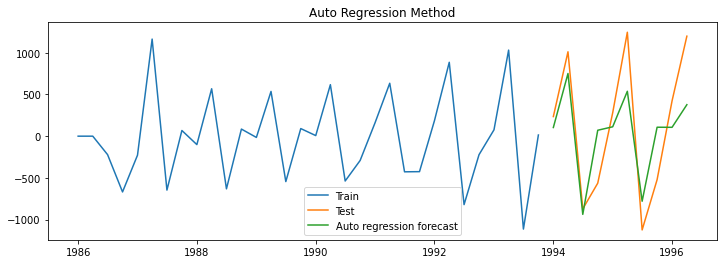

In [89]:
plt.figure(figsize=(12,4))
plt.plot(train_diff, label='Train')
plt.plot(test_diff, label='Test')
plt.plot(forecast_reg['AR_forecast'][test.index.min():], label='Auto regression forecast')
plt.legend(loc='best')
plt.title('Auto Regression Method')
plt.show()

In [90]:
mse = mean_squared_error(forecast_reg['AR_forecast'],test_diff)
RMSE = np.sqrt(mse)
RMSE

480.27941991266187

# **Moving average method (MA)**

In [91]:
import warnings
warnings.filterwarnings("ignore")
model_ma = ARIMA(train_diff, order=(0, 0, 1)).fit()

In [92]:
model_ma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:      Second Difference   No. Observations:                   32
Model:                     ARMA(0, 1)   Log Likelihood                -235.999
Method:                       css-mle   S.D. of innovations            365.569
Date:                Thu, 12 May 2022   AIC                            477.997
Time:                        18:37:14   BIC                            482.394
Sample:                    01-01-1986   HQIC                           479.455
                         - 10-01-1993                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -4.8699      6.683     -0.729      0.472     -17.968       8.228
ma.L1.Second Difference    -0.9999      0.088    -11.340      0.000      -1.173      -0.827
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.0001           +0.0000j            1.0001            0.0000
-----------------------------------------------------------------------------
"""

In [93]:
forecast_reg['MA_forecast'] = model_ma.predict(start = pred_start_date,end = pred_end_date)

In [94]:
forecast_reg

,Sales,AR_forecast,MA_forecast
date,,,
1994-01-01,3352.0,103.762580,261.802012
1994-04-01,4342.0,750.614747,-4.869859
1994-07-01,4461.0,-936.667074,-4.869859
1994-10-01,4017.0,70.995973,-4.869859
1995-01-01,3854.0,112.368470,-4.869859
1995-04-01,4936.0,537.857604,-4.869859
1995-07-01,4895.0,-779.387786,-4.869859
1995-10-01,4333.0,107.164192,-4.869859
1996-01-01,4194.0,106.139480,-4.869859


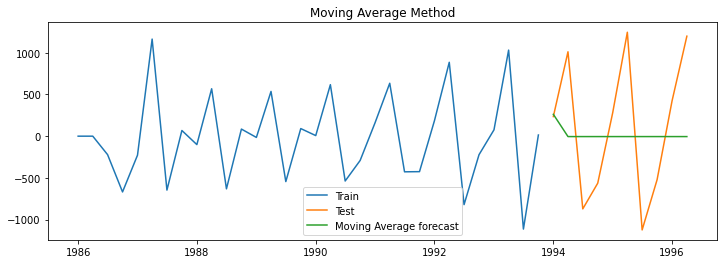

In [95]:
plt.figure(figsize=(12,4))
plt.plot(train_diff, label='Train')
plt.plot(test_diff, label='Test')
plt.plot(forecast_reg['MA_forecast'][test.index.min():], label='Moving Average forecast')
plt.legend(loc='best')
plt.title('Moving Average Method')
plt.show()

In [96]:
mse = mean_squared_error(forecast_reg['MA_forecast'],test_diff)
RMSE = np.sqrt(mse)
RMSE

829.7512086273526

# **Auto regression moving average method (ARMA)**

In [97]:
import warnings
warnings.filterwarnings("ignore")
model_arma = ARIMA(train_diff, order=(5,0,1)).fit()

In [98]:
model_arma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:      Second Difference   No. Observations:                   32
Model:                     ARMA(5, 1)   Log Likelihood                -226.753
Method:                       css-mle   S.D. of innovations            272.632
Date:                Thu, 12 May 2022   AIC                            469.506
Time:                        18:37:16   BIC                            481.232
Sample:                    01-01-1986   HQIC                           473.393
                         - 10-01-1993                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     -24.3670     30.204     -0.807      0.427     -83.566      34.831
ar.L1.Second Difference    -0.9392      0.709     -1.324      0.198      -2.330       0.451
ar.L2.Second Difference    -0.6034      0.547     -1.103      0.281      -1.676       0.469
ar.L3.Second Difference    -0.4841      0.534     -0.906      0.373      -1.531       0.563
ar.L4.Second Difference     0.3571      0.505      0.707      0.486      -0.633       1.347
ar.L5.Second Difference     0.2845      0.385      0.739      0.467      -0.470       1.039
ma.L1.Second Difference     0.3397      0.708      0.480      0.636      -1.048       1.728
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.0307           -1.0411j            1.0415           -0.2547
AR.2           -0.0307           +1.0411j            1.0415            0.2547
AR.3            1.6731           -0.0000j            1.6731           -0.0000
AR.4           -1.0900           -0.0000j            1.0900           -0.5000
AR.5           -1.7766           -0.0000j            1.7766           -0.5000
MA.1           -2.9440           +0.0000j            2.9440            0.5000
-----------------------------------------------------------------------------
"""

In [99]:
forecast_reg['ARMA_forecast'] = model_arma.predict(start = pred_start_date,end = pred_end_date)

In [100]:
forecast_reg

,Sales,AR_forecast,MA_forecast,ARMA_forecast
date,,,,
1994-01-01,3352.0,103.762580,261.802012,88.436798
1994-04-01,4342.0,750.614747,-4.869859,778.960460
1994-07-01,4461.0,-936.667074,-4.869859,-953.957213
1994-10-01,4017.0,70.995973,-4.869859,13.329309
1995-01-01,3854.0,112.368470,-4.869859,163.451844
1995-04-01,4936.0,537.857604,-4.869859,545.454426
1995-07-01,4895.0,-779.387786,-4.869859,-794.504500
1995-10-01,4333.0,107.164192,-4.869859,13.165295
1996-01-01,4194.0,106.139480,-4.869859,207.028401


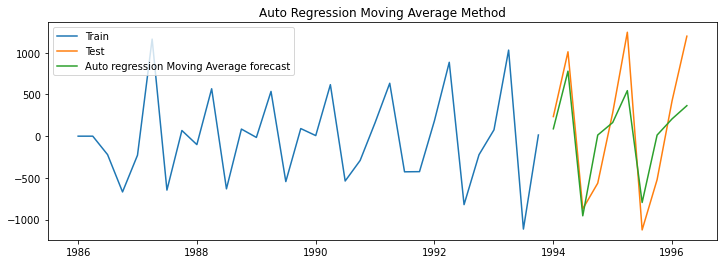

In [101]:
plt.figure(figsize=(12,4))
plt.plot(train_diff, label='Train')
plt.plot(test_diff, label='Test')
plt.plot(forecast_reg['ARMA_forecast'][test.index.min():], label='Auto regression Moving Average forecast')
plt.legend(loc='best')
plt.title('Auto Regression Moving Average Method')
plt.show()

In [102]:
mse = mean_squared_error(forecast_reg['ARMA_forecast'],test_diff)
RMSE = np.sqrt(mse)
RMSE

452.8417393961342

# **Auto regressive integrated moving average (ARIMA)**

In [103]:
import warnings
warnings.filterwarnings("ignore")
model_arima = ARIMA(train_diff, order=(1, 1, 1)).fit()

In [104]:
model_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARIMA Model Results                              
===============================================================================
Dep. Variable:     D.Second Difference   No. Observations:                   31
Model:                  ARIMA(1, 1, 1)   Log Likelihood                -238.769
Method:                        css-mle   S.D. of innovations            500.770
Date:                 Thu, 12 May 2022   AIC                            485.539
Time:                         18:37:17   BIC                            491.275
Sample:                     04-01-1986   HQIC                           487.409
                          - 10-01-1993                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.5674      7.316      0.078      0.939     -13.771      14.906
ar.L1.D.Second Difference    -0.3426      0.165     -2.078      0.047      -0.666      -0.020
ma.L1.D.Second Difference    -1.0000      0.085    -11.789      0.000      -1.166      -0.834
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.9190           +0.0000j            2.9190            0.5000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [105]:
forecast_reg['ARIMA_forecast'] = model_arima.predict(start = pred_start_date,end = pred_end_date)

In [106]:
forecast_reg

,Sales,AR_forecast,MA_forecast,ARMA_forecast,ARIMA_forecast
date,,,,,
1994-01-01,3352.0,103.762580,261.802012,88.436798,-27.880973
1994-04-01,4342.0,750.614747,-4.869859,778.960460,10.313510
1994-07-01,4461.0,-936.667074,-4.869859,-953.957213,-2.771498
1994-10-01,4017.0,70.995973,-4.869859,13.329309,1.711281
1995-01-01,3854.0,112.368470,-4.869859,163.451844,0.175531
1995-04-01,4936.0,537.857604,-4.869859,545.454426,0.701662
1995-07-01,4895.0,-779.387786,-4.869859,-794.504500,0.521415
1995-10-01,4333.0,107.164192,-4.869859,13.165295,0.583166
1996-01-01,4194.0,106.139480,-4.869859,207.028401,0.562011


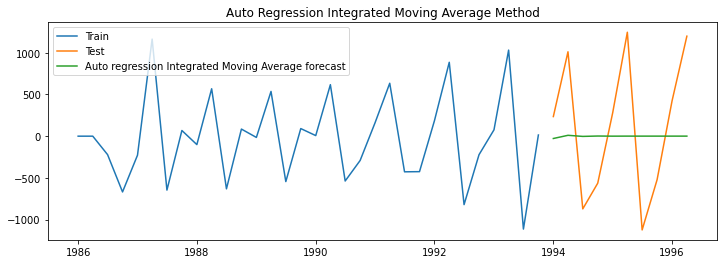

In [107]:
plt.figure(figsize=(12,4))
plt.plot(train_diff, label='Train')
plt.plot(test_diff, label='Test')
plt.plot(forecast_reg['ARIMA_forecast'][test.index.min():], label='Auto regression Integrated Moving Average forecast')
plt.legend(loc='best')
plt.title('Auto Regression Integrated Moving Average Method')
plt.show()

In [108]:
mse = mean_squared_error(forecast_reg['ARIMA_forecast'],test_diff)
RMSE = np.sqrt(mse)
RMSE

831.6840604472752

# **Seasonal auto regressive integrated moving average (SARIMA)**

In [109]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [110]:
import warnings
warnings.filterwarnings("ignore")
model_SARIMA=SARIMAX(train_diff,order=(4,2,4),seasonal_order=(1,2,1,4)).fit()

In [111]:
forecast_reg['SARIMAX_forecast'] = model_SARIMA.predict(start = pred_start_date,end = pred_end_date)

In [112]:
forecast_reg

,Sales,AR_forecast,MA_forecast,ARMA_forecast,ARIMA_forecast,SARIMAX_forecast
date,,,,,,
1994-01-01,3352.0,103.762580,261.802012,88.436798,-27.880973,60.121371
1994-04-01,4342.0,750.614747,-4.869859,778.960460,10.313510,1222.532473
1994-07-01,4461.0,-936.667074,-4.869859,-953.957213,-2.771498,-1084.251252
1994-10-01,4017.0,70.995973,-4.869859,13.329309,1.711281,51.440628
1995-01-01,3854.0,112.368470,-4.869859,163.451844,0.175531,219.655467
1995-04-01,4936.0,537.857604,-4.869859,545.454426,0.701662,1350.170642
1995-07-01,4895.0,-779.387786,-4.869859,-794.504500,0.521415,-1062.598835
1995-10-01,4333.0,107.164192,-4.869859,13.165295,0.583166,274.664602
1996-01-01,4194.0,106.139480,-4.869859,207.028401,0.562011,363.737234


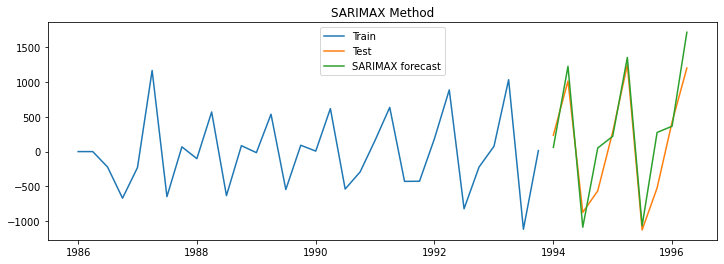

In [113]:
plt.figure(figsize=(12,4))
plt.plot(train_diff, label='Train')
plt.plot(test_diff, label='Test')
plt.plot(forecast_reg['SARIMAX_forecast'][test.index.min():], label='SARIMAX forecast')
plt.legend(loc='best')
plt.title('SARIMAX Method')
plt.show()

In [114]:
mse = mean_squared_error(forecast_reg['SARIMAX_forecast'],test_diff)
RMSE = np.sqrt(mse)
RMSE

376.43866331583064

# **Conclusion : Our inference from the flow chart and the actual models built for forecasting the sales of the time series data, show that:  
# **1 .Cumulative moving average**
# **2.Seasonal auto regressive integrated moving average (SARIMA) technique.**

# are the best for forecasting the sales for the data.
# Both the methods have lower RMSE and MAPE values and are able to capture the trend and seasonality components well in the data